<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/urmu_lab_123_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторных работ 1,2,3

### Загружаем библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Загружаем реальные и идеальные данные 

*** Предварительно руками исправили первую строчку в файлах с реальными данными так, чтобы между названиями столбцов был разделитель 2 пробела. ***

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data1_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data2_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data3_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data1_ideal.head()

,Vx_o,Vy_o,dpsi
0,0.0,0.2,0
1,0.0,0.2,0
2,0.0,0.2,0
3,0.0,0.2,0
4,0.0,0.2,0


In [4]:
data1_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_real.txt", sep='  ', engine='python')
data2_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_real.txt", sep='  ', engine='python')
data3_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_real.txt", sep='  ', engine='python')
data1_real.head()

,t,omega_1,omega_2,omega_3,omega_4,M1,M2,M3,M4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-0.0000,0.0000,-0.0000,0.0122,0.1835,-0.1368,-0.3514,-0.0026,0.0002,-0.0002,0.0004,0.0000,-0.0000,0.0000
1,0.2,-0.8309,0.7214,0.9362,-1.0943,-1.4948,1.5883,1.1979,-1.6212,-0.0033,0.0448,-0.0155,-0.0003,0.0045,-0.0015
2,0.3,-1.9333,2.2372,2.2251,-2.4318,-1.5450,1.3797,1.1235,-1.4516,0.0012,0.1103,-0.0158,-0.0002,0.0155,-0.0031
3,0.4,-2.8857,2.9911,3.1167,-3.1532,-1.4723,1.4291,1.0716,-1.4559,0.0009,0.1518,-0.0128,-0.0000,0.0307,-0.0044
4,0.5,-4.2921,3.3599,3.7611,-3.8908,-1.0352,1.5944,1.0093,-1.3442,-0.0133,0.1913,0.0000,-0.0013,0.0498,-0.0044


### Формируем идеальные и реальные данные

In [5]:
column_names_ideal = ['t', 'omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_ssk', 'Vy_ssk', 'Vx_nsk', 'Vy_nsk', 'dpsi', 'x_ssk', 'y_ssk', 'x_nsk', 'y_nsk', 'psi']
column_names_real = column_names_ideal + ['M1', 'M2', 'M3', 'M4']

In [6]:
dt=0.1

Функция для нахождения угловых скоростей колёс по заданным скоростям платформы

In [7]:
l = 0.15
h = 0.235
R = 0.05

In [8]:
def get_omega(data_ideal, l, h, R):
  omega1 = (data_ideal['Vx_o']-data_ideal['Vy_o']-(h+l)*data_ideal['dpsi'])/R
  omega2 = (data_ideal['Vx_o']+data_ideal['Vy_o']+(h+l)*data_ideal['dpsi'])/R
  omega3 = (data_ideal['Vx_o']+data_ideal['Vy_o']-(h+l)*data_ideal['dpsi'])/R
  omega4 = (data_ideal['Vx_o']-data_ideal['Vy_o']+(h+l)*data_ideal['dpsi'])/R
  return omega1, omega2, omega3, omega4

Функция для перехода из локальных скоростей в глобальные

In [9]:
def loc2glob_v(X_loc, Y_loc, Psi):
  X_glob=[]
  Y_glob=[]
  for i in range(len(X_loc)):
    X_glob.append(X_loc[i]*np.cos(Psi[i]) - Y_loc[i]*np.sin(Psi[i]))
    Y_glob.append(X_loc[i]*np.sin(Psi[i]) + Y_loc[i]*np.cos(Psi[i]))
  return X_glob, Y_glob

Функция общего вида для перехода в глобальные координаты

In [10]:
# Пока в отчёте не участвует
def loc2glob_p(X_loc, Y_loc, Psi):
  steps_X_loc = X_loc - np.concatenate(([0], X_loc[:-1]))
  steps_Y_loc = Y_loc - np.concatenate(([0], Y_loc[:-1]))
  X_glob_sum=0
  Y_glob_sum=0
  X_glob=[]
  Y_glob=[]
  for i in range(len(X_loc)):
    X_glob_sum+=steps_X_loc[i]*np.cos(Psi[i]) - steps_Y_loc[i]*np.sin(Psi[i])
    Y_glob_sum+=steps_X_loc[i]*np.sin(Psi[i]) + steps_Y_loc[i]*np.cos(Psi[i])
    X_glob.append(X_glob_sum)
    Y_glob.append(Y_glob_sum)
  return X_glob, Y_glob

Функция общего вида для перехода в локальные координаты

In [11]:
# Пока в отчёте не участвует
def glob2loc_p(X_glob, Y_glob, Psi):
  steps_X_glob = X_glob - np.concatenate(([0], X_glob[:-1]))
  steps_Y_glob = Y_glob - np.concatenate(([0], Y_glob[:-1]))
  X_loc_sum=0
  Y_loc_sum=0
  X_loc=[]
  Y_loc=[]
  for i in range(len(X_glob)):
    step_X_loc = (steps_X_glob[i]+steps_Y_glob[i]*np.tan(Psi[i]))/(np.cos(Psi[i])+np.sin(Psi[i])*np.tan(Psi[i]))
    X_loc_sum+=step_X_loc
    Y_loc_sum+=(steps_Y_glob[i]-step_X_loc*np.sin(Psi[i]))/np.cos(Psi[i])
    X_loc.append(X_loc_sum)
    Y_loc.append(Y_loc_sum)
  return X_loc, Y_loc

Функция для нахождения координат в каждой точке по скоростям как интеграл V по dt

In [12]:
def integral(V, dt):
  Integral_V=[]
  sum=0
  for v in V:
    #Integral_V.append(sum)
    sum+=v*dt
    Integral_V.append(sum)
  return np.array(Integral_V)

Функция для формирования df_ideal

In [13]:
def get_df_ideal(data_ideal):
  df_ideal = data_ideal.copy()
  (df_ideal['omega_1'], df_ideal['omega_2'], df_ideal['omega_3'], df_ideal['omega_4']) = get_omega(df_ideal, l, h, R)
  df_ideal = df_ideal.rename(columns={"Vx_o": "Vx_ssk", "Vy_o": "Vy_ssk"})
  df_ideal['psi'] = integral(df_ideal['dpsi'], dt)
  #df_ideal['Vx_nsk'], df_ideal['Vy_nsk'] = loc2glob_v(df_ideal['Vx_ssk'], df_ideal['Vy_ssk'], [0]+list(df_ideal['psi'][:-1].values))
  df_ideal['Vx_nsk'], df_ideal['Vy_nsk'] = loc2glob_v(df_ideal['Vx_ssk'], df_ideal['Vy_ssk'], df_ideal['psi'])
  df_ideal['t'], df_ideal['x_ssk'], df_ideal['y_ssk'] = integral([1]*len(df_ideal), dt), integral(df_ideal['Vx_ssk'], dt), integral(df_ideal['Vy_ssk'], dt)
  df_ideal['x_nsk'], df_ideal['y_nsk'] = integral(df_ideal['Vx_nsk'], dt), integral(df_ideal['Vy_nsk'], dt)
  df_ideal = df_ideal.reindex(columns=column_names_ideal)
  return df_ideal

Функция для формирования df_real

In [14]:
def get_df_real(data_real):
  df_real = data_real.copy()
  df_real = df_real.rename(columns={"Vx_o": "Vx_ssk", "Vy_o": "Vy_ssk"})
  # Пересчитываем координаты, так как они были посчитаны с запаздыванием на 1 позицию :))
  df_real['psi'] = integral(df_real['dpsi'], dt)
  #df_real['Vx_nsk'], df_real['Vy_nsk'] = loc2glob_v(df_real['Vx_ssk'], df_real['Vy_ssk'], [0]+list(df_real['psi'][:-1].values))
  df_real['Vx_nsk'], df_real['Vy_nsk'] = loc2glob_v(df_real['Vx_ssk'], df_real['Vy_ssk'], df_real['psi'])
  # в итоге не стал до конца пресчитывать ради красивых графиков и результатов для времени запаздывания
  df_real['x_nsk'], df_real['y_nsk'] = integral(df_real['Vx_nsk'], dt), integral(df_real['Vy_nsk'], dt)
  #df_real = df_real.rename(columns={"x0": "x_nsk", "y0": "y_nsk"})
  df_real['x_ssk'], df_real['y_ssk'] = integral(df_real['Vx_ssk'], dt), integral(df_real['Vy_ssk'], dt)
  df_real = df_real.reindex(columns=column_names_real)
  return df_real

Функция добавления локальных координат к df_real

In [15]:
# Пока в отчёте не участвует
def get_df_real_loc(df_real):
  df_real['x0_loc'], df_real['y0_loc'] = glob2loc_p(df_real['x0'], df_real['y0'], df_real['psi'])
  return df_real

Функция для вывода графиков omega от t

In [16]:
def plot_om(df):
  fig, ax = plt.subplots(nrows=4)
  ax1, ax2, ax3, ax4 = ax.flatten()

  ax1.plot(df['t'], df['omega_1'])
  ax1.set_title("Omega_1")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("Om, 1/c", fontsize=12)
  ax1.set_yticks([0, min(df['omega_1']), max(df['omega_1'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.2)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['omega_2'])
  ax2.set_title("Omega_2")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Om, 1/c", fontsize=12)
  ax2.set_yticks([0, min(df['omega_2']), max(df['omega_2'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.2)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['omega_3'])
  ax3.set_title("Omega_3")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Om, 1/c", fontsize=12)
  ax3.set_yticks([0, min(df['omega_3']), max(df['omega_3'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.2)
  ax3.set_xlim(min(df['t']), max(df['t']))

  ax4.plot(df['t'], df['omega_4'])
  ax4.set_title("Omega_4")
  ax4.set_xlabel("t, c", fontsize=12)
  ax4.set_ylabel("Om, 1/c", fontsize=12)
  ax4.set_yticks([0, min(df['omega_4']), max(df['omega_4'])])
  ax4.set_xticks(list(ax4.get_xticks()) + [min(df['t']), max(df['t'])])
  ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+0.2)
  ax4.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

Функция для вывода графиков x, y, psi от t

In [17]:
def plot_x_y_psi(df):
  fig, ax = plt.subplots(nrows=3)
  ax1, ax2, ax3 = ax.flatten()

  ax1.plot(df['t'], df['x_nsk'])
  ax1.set_title("X")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("X, m", fontsize=12)
  ax1.set_yticks([0, min(df['x_nsk']), max(df['x_nsk'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks()))
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['y_nsk'])
  ax2.set_title("Y")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Y, m", fontsize=12)
  ax2.set_yticks([0, min(df['y_nsk']), max(df['y_nsk'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks()))
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['psi'])
  ax3.set_title("Psi")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Psi, rad", fontsize=12)
  ax3.set_yticks([0, min(df['psi']), max(df['psi'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())) #+0.0001
  ax3.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

lab1

In [18]:
df1_ideal = get_df_ideal(data1_ideal)
df1_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,-4.0,4.0,4.0,-4.0,0.0,0.2,0.0,0.2,0,0.0,0.02,0.0,0.02,0.0
1,0.2,-4.0,4.0,4.0,-4.0,0.0,0.2,0.0,0.2,0,0.0,0.04,0.0,0.04,0.0
2,0.3,-4.0,4.0,4.0,-4.0,0.0,0.2,0.0,0.2,0,0.0,0.06,0.0,0.06,0.0
3,0.4,-4.0,4.0,4.0,-4.0,0.0,0.2,0.0,0.2,0,0.0,0.08,0.0,0.08,0.0
4,0.5,-4.0,4.0,4.0,-4.0,0.0,0.2,0.0,0.2,0,0.0,0.10,0.0,0.10,0.0


In [19]:
df1_real = get_df_real(data1_real)
df1_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0000,-0.0000,0.0122,0.0002,-0.0002,0.000200,-0.000200,0.0004,0.00002,-0.00002,0.000020,-0.000020,0.00004,0.1835,-0.1368,-0.3514,-0.0026
1,0.2,-0.8309,0.7214,0.9362,-1.0943,-0.0033,0.0448,-0.003232,0.044805,-0.0155,-0.00031,0.00446,-0.000303,0.004460,-0.00151,-1.4948,1.5883,1.1979,-1.6212
2,0.3,-1.9333,2.2372,2.2251,-2.4318,0.0012,0.1103,0.001541,0.110296,-0.0158,-0.00019,0.01549,-0.000149,0.015490,-0.00309,-1.5450,1.3797,1.1235,-1.4516
3,0.4,-2.8857,2.9911,3.1167,-3.1532,0.0009,0.1518,0.001563,0.151795,-0.0128,-0.00010,0.03067,0.000007,0.030670,-0.00437,-1.4723,1.4291,1.0716,-1.4559
4,0.5,-4.2921,3.3599,3.7611,-3.8908,-0.0133,0.1913,-0.012464,0.191356,0.0000,-0.00143,0.04980,-0.001239,0.049805,-0.00437,-1.0352,1.5944,1.0093,-1.3442


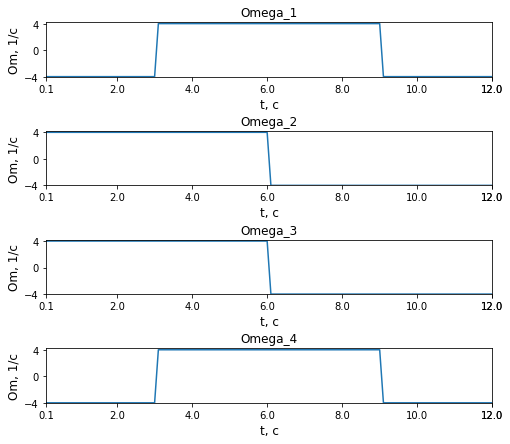

In [20]:
plot_om(df1_ideal)

lab2

In [21]:
df2_ideal = get_df_ideal(data2_ideal)
df2_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,3.225368,-3.225368,3.225368,-3.225368,0,0,0.0,0.0,-0.418879,0.0,0.0,0.0,0.0,-0.041888
1,0.2,3.225368,-3.225368,3.225368,-3.225368,0,0,0.0,0.0,-0.418879,0.0,0.0,0.0,0.0,-0.083776
2,0.3,3.225368,-3.225368,3.225368,-3.225368,0,0,0.0,0.0,-0.418879,0.0,0.0,0.0,0.0,-0.125664
3,0.4,3.225368,-3.225368,3.225368,-3.225368,0,0,0.0,0.0,-0.418879,0.0,0.0,0.0,0.0,-0.167552
4,0.5,3.225368,-3.225368,3.225368,-3.225368,0,0,0.0,0.0,-0.418879,0.0,0.0,0.0,0.0,-0.209440


In [22]:
df2_real = get_df_real(data2_real)
df2_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0000,-0.0000,0.0041,0.0001,-0.0001,0.000100,-0.000100,0.0001,0.00001,-0.00001,0.000010,-0.000010,0.00001,0.1134,-0.5185,0.0320,0.4085
1,0.2,1.8117,-1.8117,1.5928,-1.4874,0.0013,-0.0068,0.001152,-0.006827,-0.2176,0.00014,-0.00069,0.000125,-0.000693,-0.02175,0.7652,-1.2291,0.8067,-0.3757
2,0.3,2.7398,-2.5412,2.3102,-2.0346,0.0059,-0.0117,0.005272,-0.011996,-0.3125,0.00073,-0.00186,0.000652,-0.001892,-0.05300,0.5972,-1.1564,0.7963,-0.5341
3,0.4,2.9668,-2.9911,3.1654,-2.9911,0.0019,0.0025,0.002122,0.002314,-0.3933,0.00092,-0.00161,0.000865,-0.001661,-0.09233,0.6578,-1.1382,0.5843,-0.3177
4,0.5,3.1532,-3.0032,2.9668,-3.1046,0.0002,-0.0011,0.000053,-0.001117,-0.3970,0.00094,-0.00172,0.000870,-0.001773,-0.13203,0.7245,-1.2559,0.8560,-0.4077


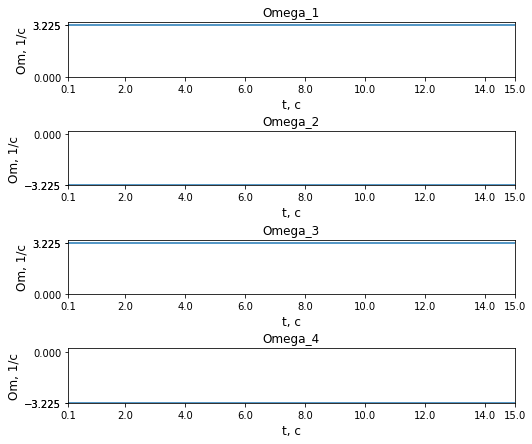

In [23]:
plot_om(df2_ideal)

lab3

In [24]:
df3_ideal = get_df_ideal(data3_ideal)
df3_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,9.1359,-1.1359,9.1359,-1.1359,0.2,0,0.199555,-0.013330,-0.667,0.02,0.0,0.019956,-0.001333,-0.0667
1,0.2,9.1359,-1.1359,9.1359,-1.1359,0.2,0,0.198223,-0.026601,-0.667,0.04,0.0,0.039778,-0.003993,-0.1334
2,0.3,9.1359,-1.1359,9.1359,-1.1359,0.2,0,0.196009,-0.039753,-0.667,0.06,0.0,0.059379,-0.007968,-0.2001
3,0.4,9.1359,-1.1359,9.1359,-1.1359,0.2,0,0.192924,-0.052729,-0.667,0.08,0.0,0.078671,-0.013241,-0.2668
4,0.5,9.1359,-1.1359,9.1359,-1.1359,0.2,0,0.188980,-0.065470,-0.667,0.10,0.0,0.097569,-0.019788,-0.3335


In [25]:
df3_real = get_df_real(data3_real)
df3_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0122,-0.0041,0.0000,0.0001,0.0001,0.000100,0.000100,0.0005,0.00001,0.00001,0.000010,0.000010,0.00005,0.1394,0.0338,0.0762,0.1004
1,0.2,3.2099,-0.0648,3.8219,-0.5471,0.0802,0.0137,0.080515,0.011709,-0.2482,0.00803,0.00138,0.008061,0.001181,-0.02477,1.9519,-0.4821,1.8549,-0.0788
2,0.3,6.6914,-0.0648,6.6630,-0.8552,0.1554,0.0095,0.155682,-0.001567,-0.4635,0.02357,0.00233,0.023630,0.001024,-0.07112,1.7104,-0.7807,1.6783,-0.0969
3,0.4,8.7706,-0.5715,9.3137,-1.0862,0.2053,0.0132,0.205205,-0.014597,-0.6410,0.04410,0.00365,0.044150,-0.000435,-0.13522,1.7883,-0.5782,1.4403,-0.0943
4,0.5,10.2378,-0.7457,11.0281,-1.2524,0.2408,0.0162,0.238861,-0.034532,-0.7553,0.06818,0.00527,0.068036,-0.003889,-0.21075,1.6169,-0.6812,0.8933,-0.0857


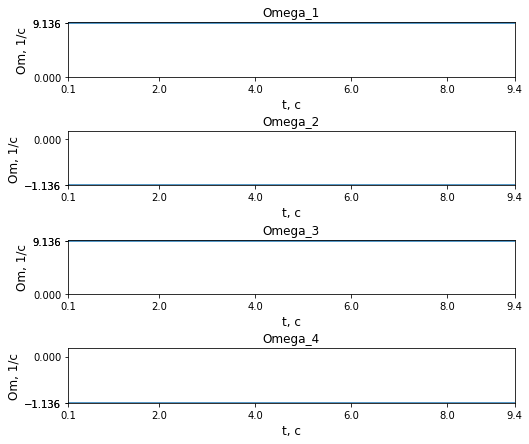

In [26]:
plot_om(df3_ideal)

### Найдём отклонения

In [27]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_ssk', 'Vy_ssk', 'Vx_nsk', 'Vy_nsk', 'dpsi', 'x_ssk', 'y_ssk', 'x_nsk', 'y_nsk', 'psi']

lab1

In [28]:
ddf1 = df1_ideal[['t']+columns_for_difference]
ddf1[columns_for_difference] -= df1_real[columns_for_difference]
ddf1.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,-4.0000,4.0000,4.0000,-4.0122,-0.0002,0.2002,-0.000200,0.200200,-0.0004,-0.00002,0.02002,-0.000020,0.020020,-0.00004
1,0.2,-3.1691,3.2786,3.0638,-2.9057,0.0033,0.1552,0.003232,0.155195,0.0155,0.00031,0.03554,0.000303,0.035540,0.00151
2,0.3,-2.0667,1.7628,1.7749,-1.5682,-0.0012,0.0897,-0.001541,0.089704,0.0158,0.00019,0.04451,0.000149,0.044510,0.00309
3,0.4,-1.1143,1.0089,0.8833,-0.8468,-0.0009,0.0482,-0.001563,0.048205,0.0128,0.00010,0.04933,-0.000007,0.049330,0.00437
4,0.5,0.2921,0.6401,0.2389,-0.1092,0.0133,0.0087,0.012464,0.008644,0.0000,0.00143,0.05020,0.001239,0.050195,0.00437


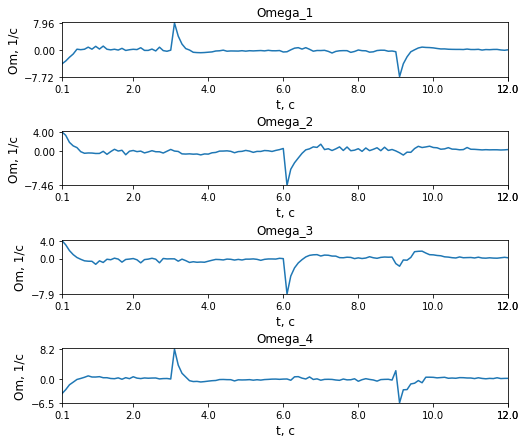

In [29]:
plot_om(ddf1)

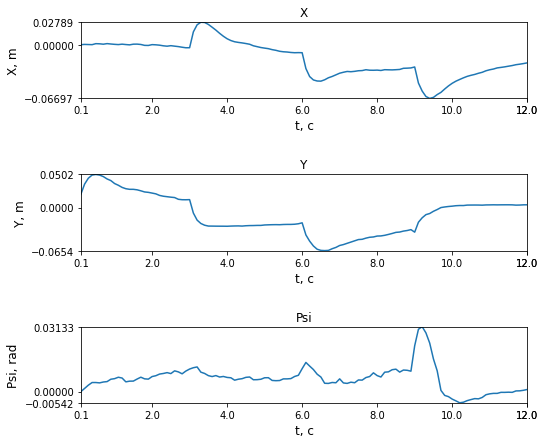

In [30]:
plot_x_y_psi(ddf1)

lab2

In [31]:
ddf2 = df2_ideal[['t']+columns_for_difference]
ddf2[columns_for_difference] -= df2_real[columns_for_difference]
ddf2.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,3.225368,-3.225368,3.225368,-3.229468,-0.0001,0.0001,-0.000100,0.000100,-0.418979,-0.00001,0.00001,-0.000010,0.000010,-0.041898
1,0.2,1.413668,-1.413668,1.632568,-1.737968,-0.0013,0.0068,-0.001152,0.006827,-0.201279,-0.00014,0.00069,-0.000125,0.000693,-0.062026
2,0.3,0.485568,-0.684168,0.915168,-1.190768,-0.0059,0.0117,-0.005272,0.011996,-0.106379,-0.00073,0.00186,-0.000652,0.001892,-0.072664
3,0.4,0.258568,-0.234268,0.059968,-0.234268,-0.0019,-0.0025,-0.002122,-0.002314,-0.025579,-0.00092,0.00161,-0.000865,0.001661,-0.075222
4,0.5,0.072168,-0.222168,0.258568,-0.120768,-0.0002,0.0011,-0.000053,0.001117,-0.021879,-0.00094,0.00172,-0.000870,0.001773,-0.077410


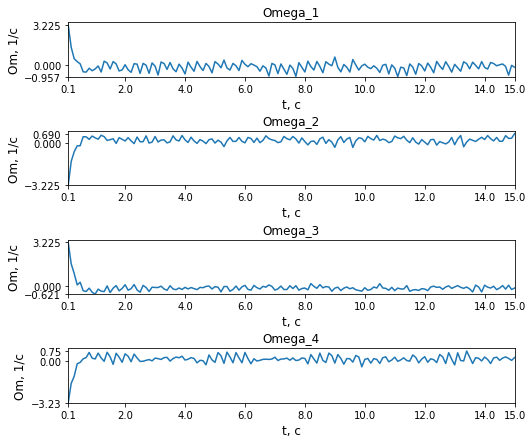

In [32]:
plot_om(ddf2)

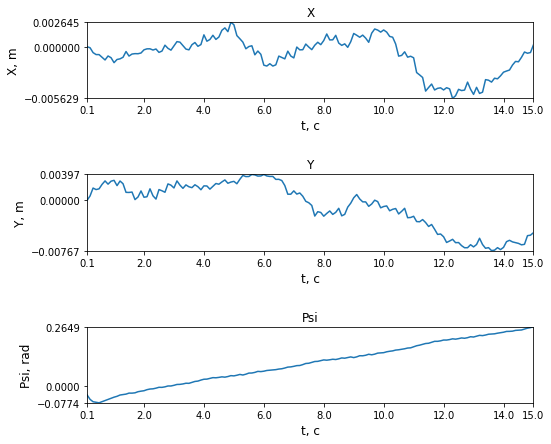

In [33]:
plot_x_y_psi(ddf2)

lab3

In [34]:
ddf3 = df3_ideal[['t']+columns_for_difference]
ddf3[columns_for_difference] -= df3_real[columns_for_difference]
ddf3.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi
0,0.1,9.1359,-1.1481,9.1400,-1.1359,0.1999,-0.0001,0.199455,-0.013430,-0.6675,0.01999,-0.00001,0.019946,-0.001343,-0.06675
1,0.2,5.9260,-1.0711,5.3140,-0.5888,0.1198,-0.0137,0.117708,-0.038310,-0.4188,0.03197,-0.00138,0.031716,-0.005174,-0.10863
2,0.3,2.4445,-1.0711,2.4729,-0.2807,0.0446,-0.0095,0.040327,-0.038187,-0.2035,0.03643,-0.00233,0.035749,-0.008993,-0.12898
3,0.4,0.3653,-0.5644,-0.1778,-0.0497,-0.0053,-0.0132,-0.012282,-0.038133,-0.0260,0.03590,-0.00365,0.034521,-0.012806,-0.13158
4,0.5,-1.1019,-0.3902,-1.8922,0.1165,-0.0408,-0.0162,-0.049881,-0.030938,0.0883,0.03182,-0.00527,0.029533,-0.015900,-0.12275


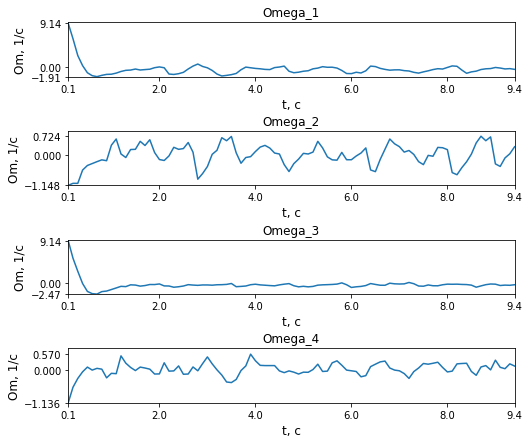

In [35]:
plot_om(ddf3)

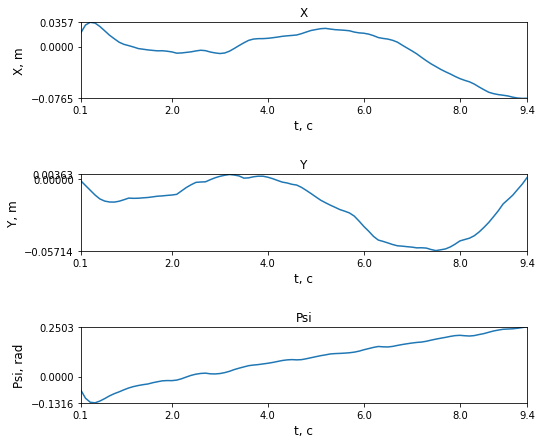

In [36]:
plot_x_y_psi(ddf3)

# 1. Время запаздывания

### Найдём время запаздывания и восстановим координаты

In [37]:
# Как в инструкции
def get_v(df_ideal, df_real, ddf, dt):
  B = np.concatenate((ddf['x_nsk'].values-integral(ddf['Vx_nsk'], dt), 
                    ddf['y_nsk'].values-integral(ddf['Vy_nsk'], dt), 
                    ddf['psi'].values-integral(ddf['dpsi'], dt)))
  A = np.concatenate((df_ideal['Vx_nsk'].values, 
                     df_ideal['Vy_nsk'].values, 
                     df_ideal['dpsi'].values))
  dtzap = (1/(A.T@A))*(A.T@B)
  df_v = df_ideal[['t']].copy()
  df_v['x_nsk'] = (df_real['x_nsk'].values + 
                df_ideal['Vx_nsk'].values*dtzap + integral(ddf['Vx_nsk'], dt))
  df_v['y_nsk'] = (df_real['y_nsk'].values + 
                df_ideal['Vy_nsk'].values*dtzap + integral(ddf['Vy_nsk'], dt))
  df_v['psi'] = (df_real['psi'].values + 
                 df_ideal['dpsi'].values*dtzap + integral(ddf['dpsi'], dt))
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x_nsk'] = df_ideal['x_nsk'] - df_v['x_nsk']
  ddf_iv['y_nsk'] = df_ideal['y_nsk'] - df_v['y_nsk']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap, df_v, ddf_iv

In [38]:
# Как в инструкции с 3 временами запаздываниями
def get_v1(df_ideal, df_real, ddf, dt):
  eps = 0.1**32
  Bx = (ddf['x_nsk'].values-integral(ddf['Vx_nsk'], dt))
  Ax = df_ideal['Vx_nsk'].values
  dtzap_x = (1/(Ax.T@Ax+eps))*(Ax.T@Bx)
  By = (ddf['y_nsk'].values-integral(ddf['Vy_nsk'], dt))
  Ay = df_ideal['Vy_nsk'].values
  dtzap_y = (1/(Ay.T@Ay+eps))*(Ay.T@By)
  Bpsi = (ddf['psi'].values-integral(ddf['dpsi'], dt))
  Apsi = df_ideal['dpsi'].values
  dtzap_psi = (1/(Apsi.T@Apsi+eps))*(Apsi.T@Bpsi)
  df_v = df_ideal[['t']].copy()
  df_v['x_nsk'] = (df_real['x_nsk'].values + df_ideal['Vx_nsk'].values*dtzap_x + integral(ddf['Vx_nsk'], dt))
  df_v['y_nsk'] = (df_real['y_nsk'].values + df_ideal['Vy_nsk'].values*dtzap_y + integral(ddf['Vy_nsk'], dt))
  df_v['psi'] = (df_real['psi'].values + df_ideal['dpsi'].values*dtzap_psi + integral(ddf['dpsi'], dt))
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x_nsk'] = df_ideal['x_nsk'] - df_v['x_nsk']
  ddf_iv['y_nsk'] = df_ideal['y_nsk'] - df_v['y_nsk']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap_x, dtzap_y, dtzap_psi, df_v, ddf_iv

In [39]:
# Как на самом деле с 3 временами запаздываниями :))
def get_v2(df_ideal, df_real, ddf, dt):
  eps = 0.1**32
  B_x = (ddf['x_nsk'].values-integral(ddf['Vx_nsk'], dt))
  A_x = df_ideal['Vx_nsk'].values
  dtzap_x = (1/(A_x.T@A_x+eps))*(A_x.T@B_x)
  B_y = (ddf['y_nsk'].values-integral(ddf['Vy_nsk'], dt))
  A_y = df_ideal['Vy_nsk'].values
  dtzap_y = (1/(A_y.T@A_y+eps))*(A_y.T@B_y)
  B_psi = (ddf['psi'].values-integral(ddf['dpsi'], dt))
  A_psi = df_ideal['dpsi'].values
  dtzap_psi = (1/(A_psi.T@A_psi+eps))*(A_psi.T@B_psi)
  df_v = df_ideal[['t']].copy()
  df_v['x_nsk'] = (df_real['x_nsk'].values + df_real['Vx_nsk'].values*dtzap_x)
  df_v['y_nsk'] = (df_real['y_nsk'].values + df_real['Vy_nsk'].values*dtzap_y)
  df_v['psi'] = (df_real['psi'].values + df_real['dpsi'].values*dtzap_psi)
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x_nsk'] = df_ideal['x_nsk'] - df_v['x_nsk']
  ddf_iv['y_nsk'] = df_ideal['y_nsk'] - df_v['y_nsk']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap_x, dtzap_y, dtzap_psi, df_v, ddf_iv

lab1

In [40]:
dtzap1, df1_v, ddf1_iv = get_v(df1_ideal, df1_real, ddf1, dt)
print("Время запаздывания: ", dtzap1)
print("Восстановленные координаты: \n")
ddf1_iv.head()

Время запаздывания:  -5.884055540259872e-17
Восстановленные координаты: 



,t,x_nsk,y_nsk,psi
0,0.1,0.0,1.387779e-17,0.0
1,0.2,0.0,2.081668e-17,0.0
2,0.3,0.0,2.081668e-17,0.0
3,0.4,0.0,1.387779e-17,0.0
4,0.5,0.0,1.387779e-17,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


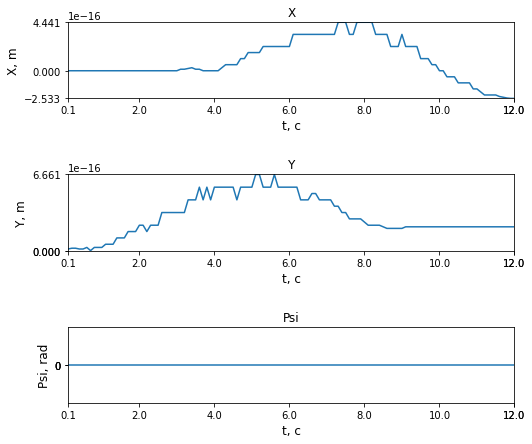

In [41]:
plot_x_y_psi(ddf1_iv)

lab2

In [42]:
dtzap2, df2_v, ddf2_iv = get_v(df2_ideal, df2_real, ddf2, dt)
print("Время запаздывания: ", dtzap2)
print("Восстановленные координаты: \n")
ddf2_iv.head()

Время запаздывания:  7.992979634454148e-15
Восстановленные координаты: 



,t,x_nsk,y_nsk,psi
0,0.1,0.0,0.0,3.344547e-15
1,0.2,0.0,0.0,3.344547e-15
2,0.3,0.0,0.0,3.358425e-15
3,0.4,0.0,0.0,3.358425e-15
4,0.5,0.0,0.0,3.358425e-15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


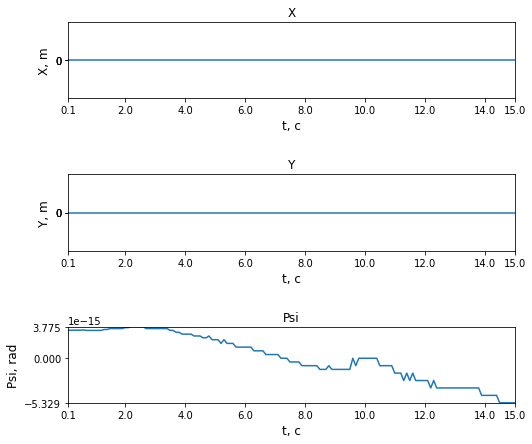

In [43]:
plot_x_y_psi(ddf2_iv)

lab3

In [44]:
dtzap3, df3_v, ddf3_iv = get_v(df3_ideal, df3_real, ddf3, dt)
print("Время запаздывания: ", dtzap3)
print("Восстановленные координаты: \n")
ddf3_iv.head()

Время запаздывания:  -5.827075978409871e-16
Восстановленные координаты: 



,t,x_nsk,y_nsk,psi
0,0.1,1.144917e-16,-7.806256e-18,-3.885781e-16
1,0.2,1.179612e-16,-1.561251e-17,-3.885781e-16
2,0.3,1.110223e-16,-2.428613e-17,-4.163336e-16
3,0.4,1.110223e-16,-3.122502e-17,-4.440892e-16
4,0.5,1.110223e-16,-3.816392e-17,-3.885781e-16


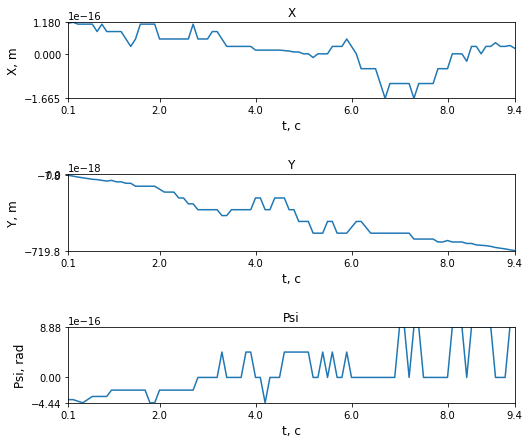

In [45]:
plot_x_y_psi(ddf3_iv)

### Сравним визуально траектории

In [46]:
def get_trajectory(df_ideal, df_real, df_v):
  plt.figure(figsize=(11, 7))
  plt.plot(-df_ideal['y_nsk'], df_ideal['x_nsk'], label="Ideal")
  plt.plot(-df_real['y_nsk'], df_real['x_nsk'], label="Real")
  plt.plot(-df_v['y_nsk'], df_v['x_nsk'], label="Restored")
  plt.xlabel("-Y, m", fontsize=15)
  plt.ylabel("X, m", fontsize=15)
  plt.axis('equal')
  plt.legend(loc='upper right', fontsize=15)
  plt.show()

lab1

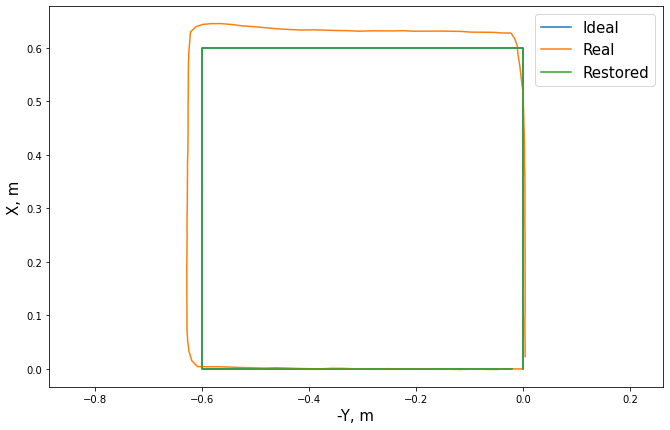

In [47]:
get_trajectory(df1_ideal, df1_real, df1_v)

lab2

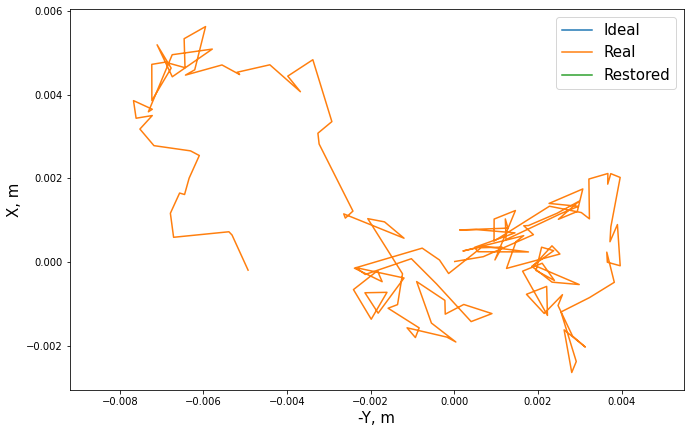

In [48]:
get_trajectory(df2_ideal, df2_real, df2_v)

lab3

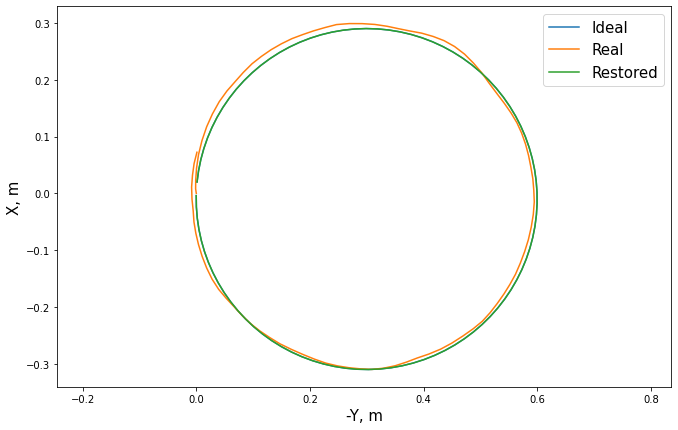

In [49]:
get_trajectory(df3_ideal, df3_real, df3_v)

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными и восстановленными и разниц идеальных скоростей с реальными

In [50]:
def math_e(series):
  return series.sum()/len(series)

In [51]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [52]:
def get_table_Math_SKO(ddf, ddf_iv):
  df_math_sko = pd.DataFrame({ 
     'omega_1': [math_e(ddf['omega_1']),
           s_dev(ddf['omega_1'], math_e(ddf['omega_1'])),
           " - ",
           " - "], 
     'omega_2': [math_e(ddf['omega_2']),
           s_dev(ddf['omega_2'], math_e(ddf['omega_2'])),
           " - ",
           " - "],
     'omega_3': [math_e(ddf['omega_3']),
           s_dev(ddf['omega_3'], math_e(ddf['omega_3'])),
           " - ",
           " - "], 
     'omega_4': [math_e(ddf['omega_4']),
           s_dev(ddf['omega_4'], math_e(ddf['omega_4'])),
           " - ",
           " - "], 
     'Vx': [math_e(ddf['Vx_nsk']),
           s_dev(ddf['Vx_nsk'], math_e(ddf['Vx_nsk'])),
           " - ",
           " - "],
     'Vy': [math_e(ddf['Vy_nsk']),
           s_dev(ddf['Vy_nsk'], math_e(ddf['Vy_nsk'])),
           " - ",
           " - "],
     'dpsi': [math_e(ddf['dpsi']),
           s_dev(ddf['dpsi'], math_e(ddf['dpsi'])),
           " - ",
           " - "],
     'X': [math_e(ddf['x_nsk']),
           s_dev(ddf['x_nsk'], math_e(ddf['x_nsk'])),
           math_e(ddf_iv['x_nsk']),
           s_dev(ddf_iv['x_nsk'], math_e(ddf_iv['x_nsk']))], 
     'Y': [math_e(ddf['y_nsk']),
           s_dev(ddf['y_nsk'], math_e(ddf['y_nsk'])),
           math_e(ddf_iv['y_nsk']),
           s_dev(ddf_iv['y_nsk'], math_e(ddf_iv['y_nsk']))], 
     'Psi': [math_e(ddf['psi']),
           s_dev(ddf['psi'], math_e(ddf['psi'])),
           math_e(ddf_iv['psi']),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return df_math_sko

In [53]:
print("Лаб. 1")
print("Время запаздывания: ", dtzap1)
print("Мат. ожидание и CКО: ")
df_math_sko_1 = get_table_Math_SKO(ddf1, ddf1_iv)
df_math_sko_1

Лаб. 1
Время запаздывания:  -5.884055540259872e-17
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.043872,-0.041509,-0.036476,-0.036273,-0.001891,0.000348,0.000084,-1.797447e-02,-1.157055e-02,0.006209
SKO_ir,1.330214,1.062753,1.101175,1.268688,0.038406,0.043924,0.021456,2.203967e-02,2.999621e-02,0.006180
Math_iv,-,-,-,-,-,-,-,9.697104e-17,3.028827e-16,0.000000
SKO_iv,-,-,-,-,-,-,-,1.858476e-16,1.747666e-16,0.000000


In [54]:
print("Лаб. 2")
print("Время запаздывания: ", dtzap2)
print("Мат. ожидание и CКО: ")
df_math_sko_2 = get_table_Math_SKO(ddf2, ddf2_iv)
df_math_sko_2

Лаб. 2
Время запаздывания:  7.992979634454148e-15
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.142041,0.159277,-0.138986,0.103748,0.000013,-0.000329,0.017663,-0.000940,-0.000820,9.941673e-02
SKO_ir,0.449473,0.377798,0.359474,0.408691,0.005171,0.005824,0.045855,0.001953,0.003581,9.609665e-02
Math_iv,-,-,-,-,-,-,-,0.000000,0.000000,1.121325e-16
SKO_iv,-,-,-,-,-,-,-,0.000000,0.000000,2.795903e-15


In [55]:
print("Лаб. 3")
print("Время запаздывания: ", dtzap3)
print("Мат. ожидание и CКО: ")
df_math_sko_3 = get_table_Math_SKO(ddf3, ddf3_iv)
df_math_sko_3

Лаб. 3
Время запаздывания:  -5.827075978409871e-16
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.36223,-0.002887,-0.42091,0.039836,-0.00812,0.000129,0.026626,-6.567735e-03,-2.159385e-02,8.337213e-02
SKO_ir,1.350572,0.411475,1.279298,0.232841,0.034828,0.022286,0.094604,3.062472e-02,1.992834e-02,1.045692e-01
Math_iv,-,-,-,-,-,-,-,1.611078e-17,-3.856749e-16,1.012783e-16
SKO_iv,-,-,-,-,-,-,-,6.814908e-17,2.191253e-16,4.007203e-16


### Дисперсия, мат. ожидание и CКО для разности идеальных и реальных скоростей Vx, Vy, Om

lab1

In [56]:
df_table_1 = df_math_sko_1[['Vx', 'Vy', 'dpsi']].head(2)
df_table_1.loc['Disper_ir'] = df_table_1.values[1]**2
df_table_1.head()

,Vx,Vy,dpsi
Math_ir,-0.001891,0.000348,0.000084
SKO_ir,0.038406,0.043924,0.021456
Disper_ir,0.001475,0.001929,0.00046


lab2

In [57]:
df_table_2 = df_math_sko_2[['Vx', 'Vy', 'dpsi']].head(2)
df_table_2.loc['Disper_ir'] = df_table_2.values[1]**2
df_table_2.head()

,Vx,Vy,dpsi
Math_ir,0.000013,-0.000329,0.017663
SKO_ir,0.005171,0.005824,0.045855
Disper_ir,0.000027,0.000034,0.002103


lab3

In [58]:
df_table_3 = df_math_sko_3[['Vx', 'Vy', 'dpsi']].head(2)
df_table_3.loc['Disper_ir'] = df_table_3.values[1]**2
df_table_3.head()

,Vx,Vy,dpsi
Math_ir,-0.00812,0.000129,0.026626
SKO_ir,0.034828,0.022286,0.094604
Disper_ir,0.001213,0.000497,0.00895


### Мат. ожидание и CКО для разности идеальных и реальных координат X, Y, Psi

lab1

In [59]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,9.697104e-17,3.028827e-16,0.0
SKO_iv,1.858476e-16,1.747666e-16,0.0


lab2

In [60]:
df_math_sko_2[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,-0.000940,-0.000820,0.099417
SKO_ir,0.001953,0.003581,0.096097


lab3

In [61]:
df_math_sko_3[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,-0.006568,-0.021594,0.083372
SKO_ir,0.030625,0.019928,0.104569


### Мат. ожидание и CКО для разности идеальных и восстановленных координат X, Y, Psi

lab1

In [62]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,9.697104e-17,3.028827e-16,0.0
SKO_iv,1.858476e-16,1.747666e-16,0.0


lab2

In [63]:
df_math_sko_2[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.0,0.0,1.121325e-16
SKO_iv,0.0,0.0,2.795903e-15


lab3

In [64]:
df_math_sko_3[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,1.611078e-17,-3.856749e-16,1.012783e-16
SKO_iv,6.814908e-17,2.191253e-16,4.007203e-16


### Во сколько раз улучшились параметры распределения при учёте расмотренной модели ошибок

lab1

In [65]:
pd.DataFrame(abs(df_math_sko_1[['X', 'Y', 'Psi']].values[0:2]) / abs(df_math_sko_1[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


,X,Y,Psi
Math,1.853591e+14,3.820143e+13,inf
SKO,1.185900e+14,1.716358e+14,inf


lab2

In [66]:
pd.DataFrame(abs(df_math_sko_2[['X', 'Y', 'Psi']].values[0:2]) / abs(df_math_sko_2[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


,X,Y,Psi
Math,inf,inf,8.866003e+14
SKO,inf,inf,3.437052e+13


lab3

In [67]:
pd.DataFrame(abs(df_math_sko_3[['X', 'Y', 'Psi']].values[0:2]) / abs(df_math_sko_3[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,4.076608e+14,5.598976e+13,8.231981e+14
SKO,4.493783e+14,9.094492e+13,2.609532e+14


# 2. ООС

In [68]:
def get_table_Math_SKO_points(ddf, ddf_iv):
  df_math_sko = pd.DataFrame({ 
     'X': [math_e(ddf['x_nsk']),
           s_dev(ddf['x_nsk'], math_e(ddf['x_nsk'])),
           math_e(ddf_iv['x_nsk']),
           s_dev(ddf_iv['x_nsk'], math_e(ddf_iv['x_nsk']))], 
     'Y': [math_e(ddf['y_nsk']),
           s_dev(ddf['y_nsk'], math_e(ddf['y_nsk'])),
           math_e(ddf_iv['y_nsk']),
           s_dev(ddf_iv['y_nsk'], math_e(ddf_iv['y_nsk']))], 
     'Psi': [math_e(ddf['psi']),
           s_dev(ddf['psi'], math_e(ddf['psi'])),
           math_e(ddf_iv['psi']),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return df_math_sko

## 1). В ССК

### Найдём паразитные ускорения

In [69]:
def diff(V, t):
  dV = (V - np.concatenate(([0], V[:-1]))) / (t - np.concatenate(([0], t[:-1])))
  return dV

In [70]:
def diff_ddf_ssk(ddf):
  ddf['ddpsi'] = diff(ddf['dpsi'], ddf['t'])
  ddf['dVx_ssk'] = diff(ddf['Vx_ssk'], ddf['t'])
  ddf['dVy_ssk'] = diff(ddf['Vy_ssk'], ddf['t'])

In [71]:
diff_ddf_ssk(ddf1)
ddf1[['t', 'ddpsi', 'dVx_ssk', 'dVy_ssk']].head()

,t,ddpsi,dVx_ssk,dVy_ssk
0,0.1,-0.004,-0.002,2.002
1,0.2,0.159,0.035,-0.450
2,0.3,0.003,-0.045,-0.655
3,0.4,-0.030,0.003,-0.415
4,0.5,-0.128,0.142,-0.395


In [72]:
diff_ddf_ssk(ddf2)
ddf2[['t', 'ddpsi', 'dVx_ssk', 'dVy_ssk']].head()

,t,ddpsi,dVx_ssk,dVy_ssk
0,0.1,-4.18979,-0.001,0.001
1,0.2,2.17700,-0.012,0.067
2,0.3,0.94900,-0.046,0.049
3,0.4,0.80800,0.040,-0.142
4,0.5,0.03700,0.017,0.036


In [73]:
diff_ddf_ssk(ddf3)
ddf3[['t', 'ddpsi', 'dVx_ssk', 'dVy_ssk']].head()

,t,ddpsi,dVx_ssk,dVy_ssk
0,0.1,-6.675,1.999,-0.001
1,0.2,2.487,-0.801,-0.136
2,0.3,2.153,-0.752,0.042
3,0.4,1.775,-0.499,-0.037
4,0.5,1.143,-0.355,-0.030


### Востановленные скорости 

In [74]:
def get_Vr(Vi, dV, xi):
  Vr = []
  Vu = Vi[0]
  xr = 0
  for i in range(len(Vi)):
    Vr_i = Vu + dV[i] * dt
    Vr.append(Vr_i)
    xr += Vr_i * dt
    Vu = Vi[i] + (Vi[i] - Vr_i) * 0.25 + (xi[i] - xr) / dt
  return Vr

In [75]:
def get_df_Vr_ssk(df_ideal, ddf):
  df_r = df_ideal[['t']].copy()
  df_r['Vx_ssk'] = get_Vr(df_ideal['Vx_ssk'], ddf['dVx_ssk'], df_ideal['x_ssk'])
  df_r['Vy_ssk'] = get_Vr(df_ideal['Vy_ssk'], ddf['dVy_ssk'], df_ideal['y_ssk'])
  df_r['dpsi'] = get_Vr(df_ideal['dpsi'], ddf['ddpsi'], df_ideal['psi'])
  df_r['psi'] = integral(df_r['dpsi'], dt)
  #df_r['Vx_nsk'], df_r['Vy_nsk'] = loc2glob_v(df_r['Vx_ssk'], df_r['Vy_ssk'], [0]+list(df_r['psi'][:-1].values))
  df_r['Vx_nsk'], df_r['Vy_nsk'] = loc2glob_v(df_r['Vx_ssk'], df_r['Vy_ssk'], df_r['psi'])
  df_r['x_nsk'], df_r['y_nsk'] = integral(df_r['Vx_nsk'], dt), integral(df_r['Vy_nsk'], dt)
  return df_r

In [76]:
df1_r_ssk = get_df_Vr_ssk(df1_ideal, ddf1)
df1_r_ssk.head()

,t,Vx_ssk,Vy_ssk,dpsi,psi,Vx_nsk,Vy_nsk,x_nsk,y_nsk
0,0.1,-0.000200,0.400200,-0.000400,-0.000040,-0.000184,0.400200,-0.000018,0.040020
1,0.2,0.003750,-0.095250,0.016400,0.001600,0.003902,-0.095244,0.000372,0.030496
2,0.3,-0.008987,0.303363,-0.019800,-0.000380,-0.008872,0.303366,-0.000515,0.060832
3,0.4,0.007984,0.124347,0.005750,0.000195,0.007960,0.124348,0.000281,0.073267
4,0.5,0.009657,0.246754,-0.016188,-0.001424,0.010008,0.246740,0.001281,0.097941


In [77]:
df2_r_ssk = get_df_Vr_ssk(df2_ideal, ddf2)
df2_r_ssk.head()

,t,Vx_ssk,Vy_ssk,dpsi,psi,Vx_nsk,Vy_nsk,x_nsk,y_nsk
0,0.1,-0.000100,0.000100,-0.837858,-0.083786,-0.000091,0.000108,-0.000009,0.000011
1,0.2,-0.001075,0.006575,0.322545,-0.051531,-0.000735,0.006622,-0.000083,0.000673
2,0.3,-0.003156,-0.003419,-0.831780,-0.134709,-0.003587,-0.002964,-0.000441,0.000377
3,0.4,0.009120,-0.016602,-0.144398,-0.149149,0.006552,-0.017772,0.000214,-0.001401
4,0.5,-0.005369,0.021096,-0.667824,-0.215932,-0.000725,0.021756,0.000141,0.000775


In [78]:
df3_r_ssk = get_df_Vr_ssk(df3_ideal, ddf3)
df3_r_ssk.head()

,t,Vx_ssk,Vy_ssk,dpsi,psi,Vx_nsk,Vy_nsk,x_nsk,y_nsk
0,0.1,0.399900,-0.000100,-1.334500,-0.133450,0.396331,-0.053308,0.039633,-0.005331
1,0.2,-0.129975,-0.013475,0.416075,-0.091843,-0.130663,-0.001498,0.026567,-0.005481
2,0.3,0.337369,0.021144,-1.138044,-0.205647,0.334578,-0.048193,0.060025,-0.010300
3,0.4,0.108464,-0.016555,-0.316270,-0.237274,0.101534,-0.041586,0.070178,-0.014458
4,0.5,0.271626,0.010125,-0.935643,-0.330838,0.260185,-0.078658,0.096196,-0.022324


### Изобразим траектории

lab1

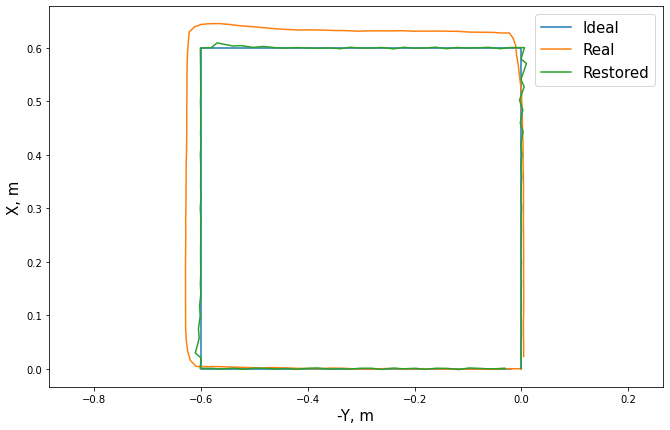

In [79]:
get_trajectory(df1_ideal, df1_real, df1_r_ssk)

lab2

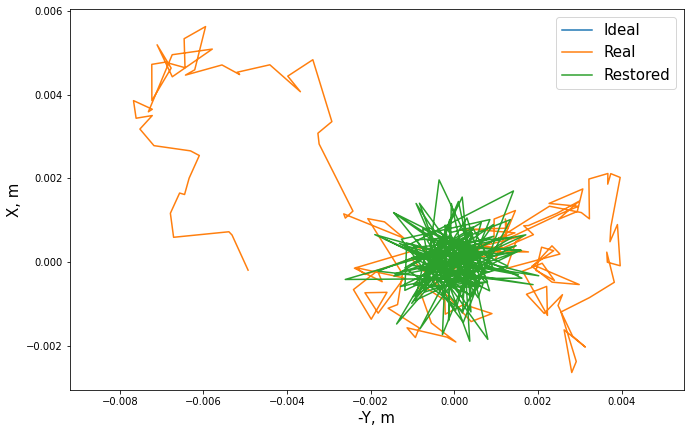

In [80]:
get_trajectory(df2_ideal, df2_real, df2_r_ssk)

lab3

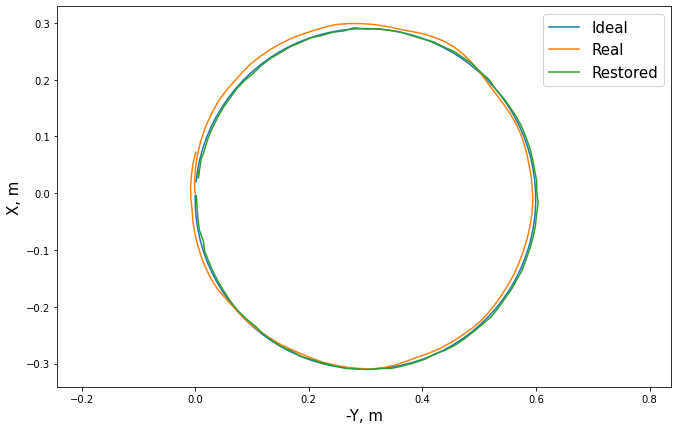

In [81]:
get_trajectory(df3_ideal, df3_real, df3_r_ssk)

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными и восстановленными

In [82]:
column_names_iv = ["x_nsk", "y_nsk", "psi"]

lab1

In [83]:
table_1_ssk = get_table_Math_SKO_points(ddf1, df1_ideal[column_names_iv] - df1_r_ssk[column_names_iv])
table_1_ssk

,X,Y,Psi
Math_ir,-0.017974,-0.011571,0.006209
SKO_ir,0.022040,0.029996,0.006180
Math_iv,-0.000306,-0.000249,-0.000002
SKO_iv,0.002118,0.002994,0.002253


lab2

In [84]:
table_2_ssk = get_table_Math_SKO_points(ddf2, df2_ideal[column_names_iv] - df2_r_ssk[column_names_iv])
table_2_ssk

,X,Y,Psi
Math_ir,-0.000940,-0.000820,0.099417
SKO_ir,0.001953,0.003581,0.096097
Math_iv,0.000005,-0.000035,-0.000031
SKO_iv,0.000724,0.000839,0.005524


lab3

In [85]:
table_3_ssk = get_table_Math_SKO_points(ddf3, df3_ideal[column_names_iv] - df3_r_ssk[column_names_iv])
table_3_ssk

,X,Y,Psi
Math_ir,-0.006568,-0.021594,0.083372
SKO_ir,0.030625,0.019928,0.104569
Math_iv,0.000277,0.002944,-0.000043
SKO_iv,0.002723,0.000784,0.008935


### Во сколько раз улучшились параметры распределения при учёте расмотренной модели ошибок

lab1

In [86]:
pd.DataFrame(abs(table_1_ssk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_1_ssk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,58.823026,46.520961,3460.73879
SKO,10.406531,10.018240,2.74322


lab2

In [87]:
pd.DataFrame(abs(table_2_ssk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_2_ssk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,188.607258,23.131994,3236.501231
SKO,2.696277,4.267880,17.395015


lab3

In [88]:
pd.DataFrame(abs(table_3_ssk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_3_ssk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,23.721236,7.335504,1958.789925
SKO,11.247058,25.431018,11.703144


## 2). В НСК

### Найдём паразитные ускорения

In [89]:
def diff_ddf_nsk(ddf):
  ddf['ddpsi'] = diff(ddf['dpsi'], ddf['t'])
  ddf['dVx_nsk'] = diff(ddf['Vx_nsk'], ddf['t'])
  ddf['dVy_nsk'] = diff(ddf['Vy_nsk'], ddf['t'])

In [90]:
diff_ddf_nsk(ddf1)
ddf1[['t', 'ddpsi', 'dVx_nsk', 'dVy_nsk']].head()

,t,ddpsi,dVx_nsk,dVy_nsk
0,0.1,-0.004,-0.002000,2.002000
1,0.2,0.159,0.034324,-0.450049
2,0.3,0.003,-0.047732,-0.654908
3,0.4,-0.030,-0.000225,-0.414989
4,0.5,-0.128,0.140272,-0.395617


In [91]:
diff_ddf_nsk(ddf2)
ddf2[['t', 'ddpsi', 'dVx_nsk', 'dVy_nsk']].head()

,t,ddpsi,dVx_nsk,dVy_nsk
0,0.1,-4.18979,-0.001000,0.001000
1,0.2,2.17700,-0.010518,0.067267
2,0.3,0.94900,-0.041201,0.051695
3,0.4,0.80800,0.031495,-0.143103
4,0.5,0.03700,0.020690,0.034309


In [92]:
diff_ddf_nsk(ddf3)
ddf3[['t', 'ddpsi', 'dVx_nsk', 'dVy_nsk']].head()

,t,ddpsi,dVx_nsk,dVy_nsk
0,0.1,-6.675,1.994553,-0.134301
1,0.2,2.487,-0.817469,-0.248803
2,0.3,2.153,-0.773813,0.001237
3,0.4,1.775,-0.526086,0.000542
4,0.5,1.143,-0.375991,0.071943


### Востановленные скорости 

In [93]:
def get_df_Vr_nsk(df_ideal, ddf):
  df_r = df_ideal[['t']].copy()
  df_r['Vx_nsk'] = get_Vr(df_ideal['Vx_nsk'], ddf['dVx_nsk'], df_ideal['x_nsk'])
  df_r['Vy_nsk'] = get_Vr(df_ideal['Vy_nsk'], ddf['dVy_nsk'], df_ideal['y_nsk'])
  df_r['dpsi'] = get_Vr(df_ideal['dpsi'], ddf['ddpsi'], df_ideal['psi'])
  df_r['psi'] = integral(df_r['dpsi'], dt)
  df_r['x_nsk'], df_r['y_nsk'] = integral(df_r['Vx_nsk'], dt), integral(df_r['Vy_nsk'], dt)
  return df_r

In [94]:
df1_r_nsk = get_df_Vr_nsk(df1_ideal, ddf1)
df1_r_nsk.head()

,t,Vx_nsk,Vy_nsk,dpsi,psi,x_nsk,y_nsk
0,0.1,-0.000200,0.400200,-0.000400,-0.000040,-0.000020,0.040020
1,0.2,0.003682,-0.095255,0.016400,0.001600,0.000348,0.030495
2,0.3,-0.009176,0.303378,-0.019800,-0.000380,-0.000569,0.060832
3,0.4,0.007965,0.124334,0.005750,0.000195,0.000227,0.073266
4,0.5,0.009764,0.246698,-0.016188,-0.001424,0.001204,0.097935


In [95]:
df2_r_nsk = get_df_Vr_nsk(df2_ideal, ddf2)
df2_r_nsk.head()

,t,Vx_nsk,Vy_nsk,dpsi,psi,x_nsk,y_nsk
0,0.1,-0.000100,0.000100,-0.837858,-0.083786,-0.000010,0.000010
1,0.2,-0.000927,0.006602,0.322545,-0.051531,-0.000103,0.000670
2,0.3,-0.002862,-0.003183,-0.831780,-0.134709,-0.000389,0.000352
3,0.4,0.007753,-0.017034,-0.144398,-0.149149,0.000386,-0.001351
4,0.5,-0.003734,0.021204,-0.667824,-0.215932,0.000013,0.000769


In [96]:
df3_r_nsk = get_df_Vr_nsk(df3_ideal, ddf3)
df3_r_nsk.head()

,t,Vx_nsk,Vy_nsk,dpsi,psi,x_nsk,y_nsk
0,0.1,0.399011,-0.026760,-1.334500,-0.133450,0.039901,-0.002676
1,0.2,-0.131511,-0.021423,0.416075,-0.091843,0.026750,-0.004818
2,0.3,0.333554,-0.019520,-1.138044,-0.205647,0.060105,-0.006770
3,0.4,0.101749,-0.056739,-0.316270,-0.237274,0.070280,-0.012444
4,0.5,0.262028,-0.052504,-0.935643,-0.330838,0.096483,-0.017695


### Изобразим траектории

lab1

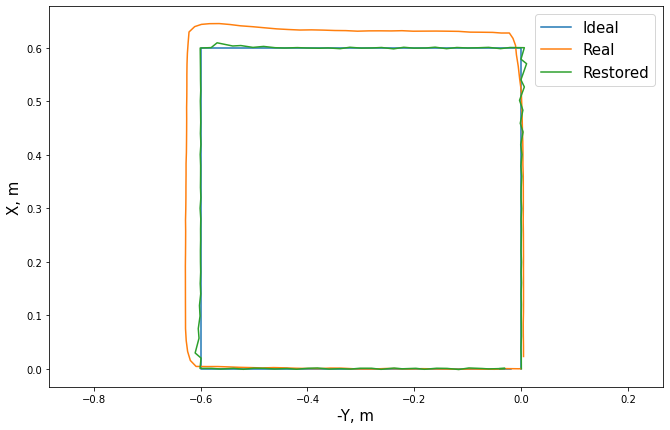

In [97]:
get_trajectory(df1_ideal, df1_real, df1_r_nsk)

lab2

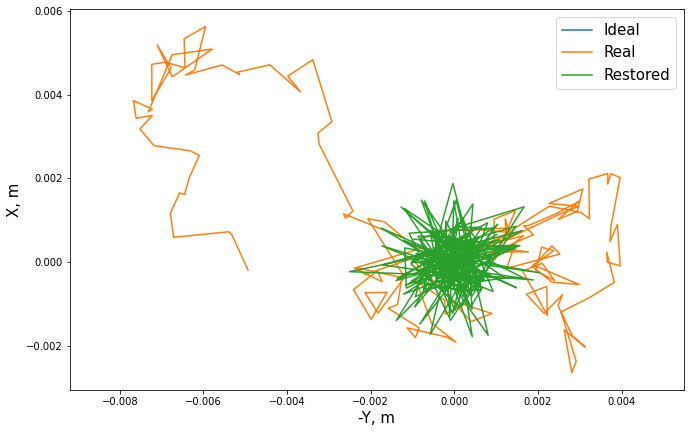

In [98]:
get_trajectory(df2_ideal, df2_real, df2_r_nsk)

lab3

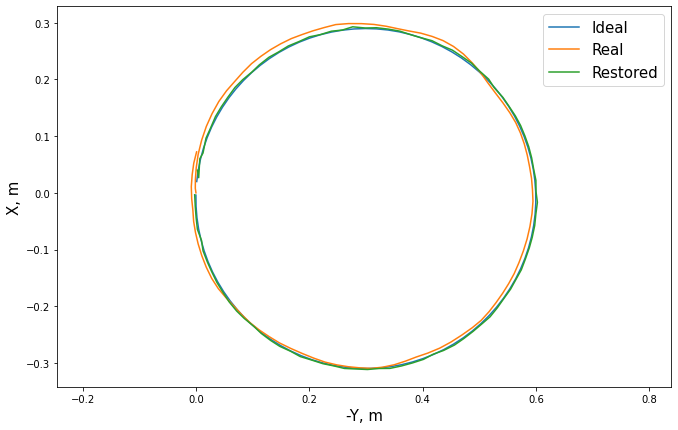

In [99]:
get_trajectory(df3_ideal, df3_real, df3_r_nsk)

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными и восстановленными

lab1

In [100]:
table_1_nsk = get_table_Math_SKO_points(ddf1, df1_ideal[column_names_iv] - df1_r_nsk[column_names_iv])
table_1_nsk

,X,Y,Psi
Math_ir,-0.017974,-0.011571,0.006209
SKO_ir,0.022040,0.029996,0.006180
Math_iv,-0.000173,-0.000167,-0.000002
SKO_iv,0.002082,0.003019,0.002253


lab2

In [101]:
table_2_nsk = get_table_Math_SKO_points(ddf2, df2_ideal[column_names_iv] - df2_r_nsk[column_names_iv])
table_2_nsk

,X,Y,Psi
Math_ir,-0.000940,-0.000820,0.099417
SKO_ir,0.001953,0.003581,0.096097
Math_iv,-0.000005,-0.000005,-0.000031
SKO_iv,0.000711,0.000822,0.005524


lab3

In [102]:
table_3_nsk = get_table_Math_SKO_points(ddf3, df3_ideal[column_names_iv] - df3_r_nsk[column_names_iv])
table_3_nsk

,X,Y,Psi
Math_ir,-6.567735e-03,-0.021594,0.083372
SKO_ir,3.062472e-02,0.019928,0.104569
Math_iv,-3.951999e-07,-0.000035,-0.000043
SKO_iv,2.932621e-03,0.001313,0.008935


### Во сколько раз улучшились параметры распределения при учёте расмотренной модели ошибок

lab1

In [103]:
pd.DataFrame(abs(table_1_nsk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_1_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,103.599262,69.177842,3460.73879
SKO,10.583484,9.934213,2.74322


lab2

In [104]:
pd.DataFrame(abs(table_2_nsk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_2_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,185.832336,163.948394,3236.501231
SKO,2.747107,4.354257,17.395015


lab3

In [105]:
pd.DataFrame(abs(table_3_nsk[['X', 'Y', 'Psi']].values[0:2]) / abs(table_3_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,16618.768108,619.373062,1958.789925
SKO,10.442782,15.173290,11.703144


## Сравним востановленные координаты в ССК и НСК

### Изобразим траектории

In [106]:
def get_trajectory_ssk_nsk(df_ideal, df_v_ssk, df_v_nsk):
  plt.figure(figsize=(11, 7))
  plt.plot(-df_ideal['y_nsk'], df_ideal['x_nsk'], label="Ideal")
  plt.plot(-df_v_ssk['y_nsk'], df_v_ssk['x_nsk'], label="SSK")
  plt.plot(-df_v_nsk['y_nsk'], df_v_nsk['x_nsk'], label="NSK")
  plt.xlabel("-Y, m", fontsize=15)
  plt.ylabel("X, m", fontsize=15)
  plt.axis('equal')
  plt.legend(loc='upper right', fontsize=15)
  plt.show()

lab1 

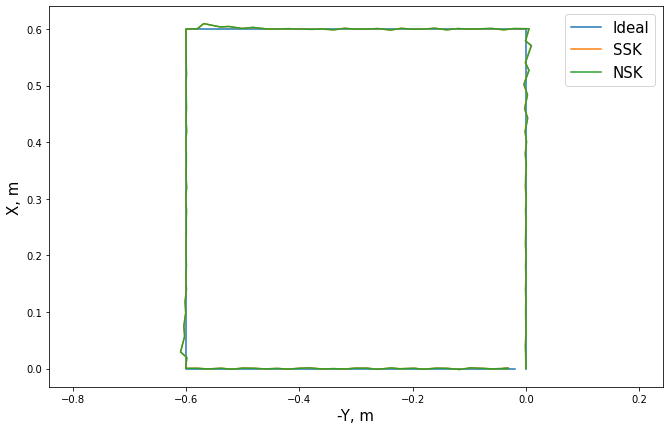

In [107]:
get_trajectory_ssk_nsk(df1_ideal, df1_r_ssk, df1_r_nsk)

lab2

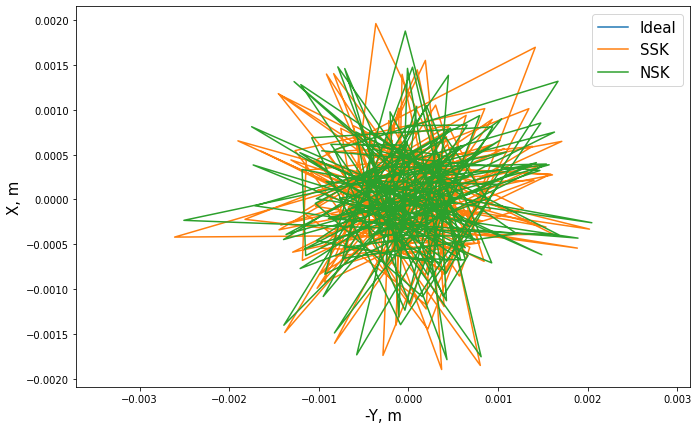

In [108]:
get_trajectory_ssk_nsk(df2_ideal, df2_r_ssk, df2_r_nsk)

lab3

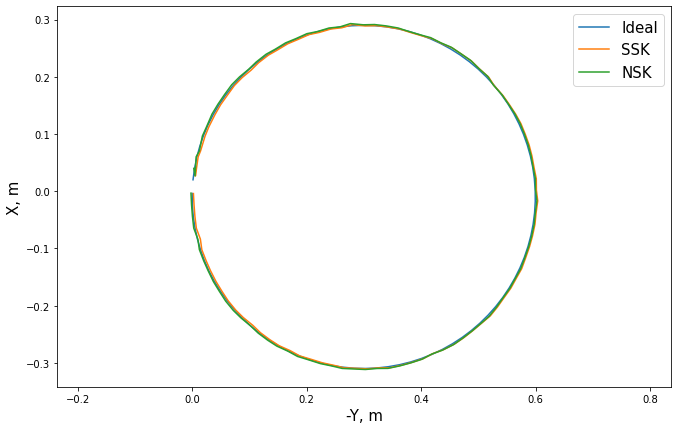

In [109]:
get_trajectory_ssk_nsk(df3_ideal, df3_r_ssk, df3_r_nsk)

### Во сколько раз NSK восстановил координаты лучше SSK

lab1

In [110]:
pd.DataFrame(abs(table_1_ssk[['X', 'Y', 'Psi']].values[2:4]) / abs(table_1_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,1.761203,1.487025,1.0
SKO,1.017004,0.991613,1.0


lab2

In [111]:
pd.DataFrame(abs(table_2_ssk[['X', 'Y', 'Psi']].values[2:4]) / abs(table_2_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,0.985287,7.087517,1.0
SKO,1.018852,1.020239,1.0


lab3

In [112]:
pd.DataFrame(abs(table_3_ssk[['X', 'Y', 'Psi']].values[2:4]) / abs(table_3_nsk[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,700.586092,84.434974,1.0
SKO,0.928490,0.596645,1.0


## Сравним результаты расчетных востановленных координат c помощью OOC с экспериментальными

### Загружаем реальные данные с ООС

*** Предварительно руками исправили первую строчку в файлах с реальными данными так, чтобы между названиями столбцов был разделитель 2 пробела. ***

In [113]:
data1_real_oos=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_real_oos.txt", sep='  ', engine='python')
data2_real_oos=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_real_oos.txt", sep='  ', engine='python')
data3_real_oos=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_real_oos.txt", sep='  ', engine='python')
data1_real_oos.head()

,t,omega_1,omega_2,omega_3,omega_4,M1,M2,M3,M4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,0.0041,0.0000,-0.0000,0.0000,-0.0649,-0.1497,-0.0840,0.1169,0.0001,-0.0001,-0.0001,0.0000,-0.0000,-0.0000
1,0.2,-2.2980,2.0224,2.5169,-2.6547,-2.2098,2.0116,1.9943,-1.9216,-0.0052,0.1187,-0.0276,-0.0005,0.0119,-0.0028
2,0.3,-4.0773,4.4015,5.1067,-4.6852,-2.1847,1.9017,1.8766,-1.9172,0.0093,0.2284,-0.0426,0.0005,0.0347,-0.0070
3,0.4,-5.5809,6.0308,7.3075,-6.6387,-2.2687,2.1276,1.9060,-2.0220,0.0140,0.3195,-0.0758,0.0021,0.0666,-0.0146
4,0.5,-7.3075,7.8911,5.4147,-5.5728,-2.0523,1.0655,0.6094,-1.3538,0.0053,0.3273,0.1367,0.0031,0.0994,-0.0009


### Предобработаем данные

lab1

In [114]:
df1_real_oos = get_df_real(data1_real_oos)
df1_real_oos.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,0.0041,0.0000,-0.0000,0.0000,0.0001,-0.0001,0.000100,-0.000100,-0.0001,0.00001,-0.00001,0.000010,-0.000010,-0.00001,-0.0649,-0.1497,-0.0840,0.1169
1,0.2,-2.2980,2.0224,2.5169,-2.6547,-0.0052,0.1187,-0.004871,0.118714,-0.0276,-0.00051,0.01186,-0.000477,0.011861,-0.00277,-2.2098,2.0116,1.9943,-1.9216
2,0.3,-4.0773,4.4015,5.1067,-4.6852,0.0093,0.2284,0.010905,0.228329,-0.0426,0.00042,0.03470,0.000613,0.034694,-0.00703,-2.1847,1.9017,1.8766,-1.9172
3,0.4,-5.5809,6.0308,7.3075,-6.6387,0.0140,0.3195,0.018666,0.319261,-0.0758,0.00182,0.06665,0.002480,0.066620,-0.01461,-2.2687,2.1276,1.9060,-2.0220
4,0.5,-7.3075,7.8911,5.4147,-5.5728,0.0053,0.3273,0.005608,0.327295,0.1367,0.00235,0.09938,0.003041,0.099350,-0.00094,-2.0523,1.0655,0.6094,-1.3538


lab2

In [115]:
df2_real_oos = get_df_real(data2_real_oos)
df2_real_oos.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.00000,0.000000,0.000000,0.00000,0.2640,-0.1489,-0.0121,-0.0286
1,0.2,4.5393,-4.8392,5.1472,-4.2921,0.0069,0.0008,0.006936,0.000377,-0.6110,0.00069,0.00008,0.000694,0.000038,-0.06110,1.7069,-1.7303,1.5295,-1.6688
2,0.3,3.7571,-4.1462,3.8300,-4.6001,-0.0145,0.0066,-0.013654,0.008208,-0.5303,-0.00076,0.00074,-0.000672,0.000859,-0.11413,1.0032,-0.9616,0.6137,-0.4700
3,0.4,5.0581,-4.2353,4.1340,-3.9151,0.0130,-0.0156,0.010166,-0.017579,-0.5631,0.00054,-0.00082,0.000345,-0.000899,-0.17044,0.7565,-0.6604,0.5920,-0.4129
4,0.5,2.6790,-3.0924,3.3721,-3.1410,-0.0023,0.0093,-0.000308,0.009575,-0.3988,0.00031,0.00011,0.000314,0.000058,-0.21032,0.5315,-0.5626,0.3237,-0.9114


lab3

In [116]:
df3_real_oos = get_df_real(data3_real_oos)
df3_real_oos.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_ssk,Vy_ssk,Vx_nsk,Vy_nsk,dpsi,x_ssk,y_ssk,x_nsk,y_nsk,psi,M1,M2,M3,M4
0,0.1,0.0162,0.0000,-0.0000,0.0000,0.0002,-0.0002,0.000200,-0.000200,-0.0005,0.00002,-0.00002,0.000020,-0.000020,-0.00005,-0.0017,0.0424,-0.0000,-0.1099
1,0.2,3.9273,-1.7509,4.8433,-2.3872,0.0579,0.0194,0.058663,0.016954,-0.4191,0.00581,0.00192,0.005886,0.001675,-0.04196,1.7536,-0.6388,1.6004,-0.5315
2,0.3,6.7603,-0.8633,7.0035,-0.6079,0.1537,-0.0002,0.153040,-0.014231,-0.4946,0.02118,0.00190,0.021190,0.000252,-0.09142,1.6809,-0.4839,1.7112,-0.0164
3,0.4,9.9946,-1.9697,10.1202,-1.2037,0.2118,-0.0080,0.207522,-0.043101,-0.7561,0.04236,0.00110,0.041943,-0.004058,-0.16703,1.5234,-0.6968,1.5156,-0.4397
4,0.5,12.2845,-1.1065,12.6817,-0.7214,0.2892,0.0002,0.279970,-0.072482,-0.8699,0.07128,0.00112,0.069939,-0.011306,-0.25402,1.6143,-0.5193,1.6091,-0.3367


### Изобразим траектории

In [117]:
def get_trajectory_oos(df_ideal, df_real, df_v, lab1=False):
  plt.figure(figsize=(11, 7))
  plt.plot(-df_ideal['y_nsk'], df_ideal['x_nsk'], label="Ideal")
  plt.plot(-df_real['y_nsk'], df_real['x_nsk'], label="Real_OOS")
  plt.plot(-df_v['y_nsk'], df_v['x_nsk'], label="Restored")
  plt.xlabel("-Y, m", fontsize=15)
  plt.ylabel("X, m", fontsize=15)
  plt.axis('equal')
  if lab1:
    plt.xlim([-1, 0.5])
  plt.legend(loc='upper right', fontsize=15)
  plt.show()

lab1

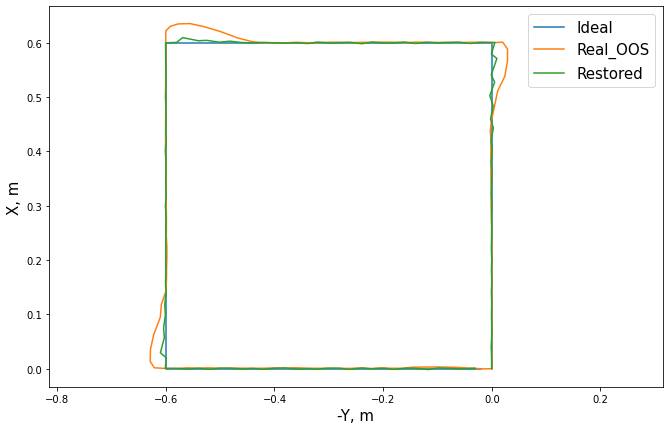

In [118]:
get_trajectory_oos(df1_ideal, df1_real_oos, df1_r_ssk, lab1=True)

lab2

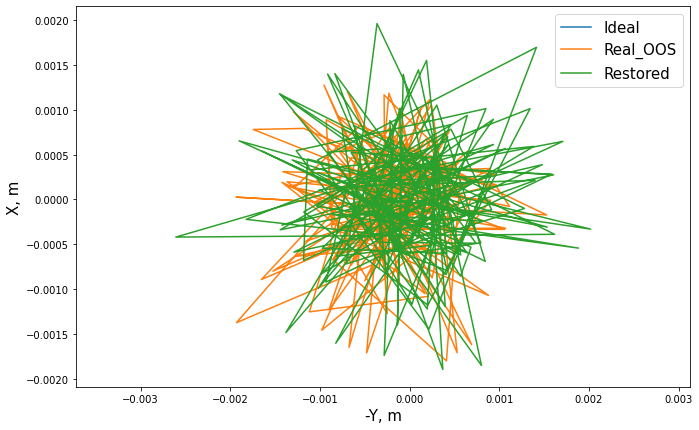

In [119]:
get_trajectory_oos(df2_ideal, df2_real_oos, df2_r_ssk)

lab3

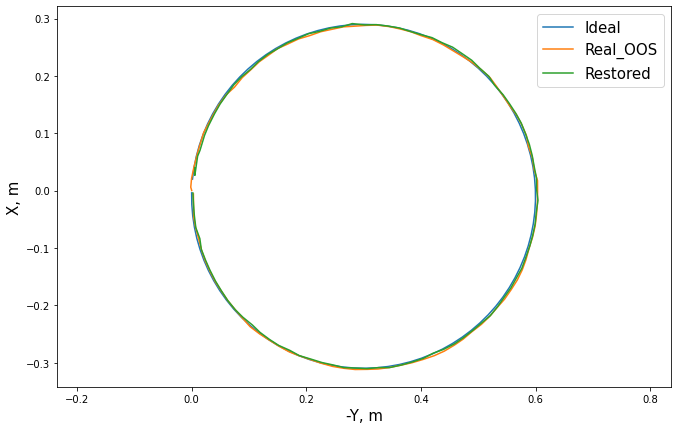

In [120]:
get_trajectory_oos(df3_ideal, df3_real_oos, df3_r_ssk)

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными (ООС) и восстановленными

lab1

In [121]:
table_1_oos = get_table_Math_SKO_points(df1_ideal[column_names_iv] - df1_real_oos[column_names_iv], 
                                        df1_ideal[column_names_iv] - df1_r_ssk[column_names_iv])
table_1_oos

,X,Y,Psi
Math_ir,-0.002277,-0.001069,0.000295
SKO_ir,0.008852,0.010503,0.003146
Math_iv,-0.000306,-0.000249,-0.000002
SKO_iv,0.002118,0.002994,0.002253


lab2

In [122]:
table_2_oos = get_table_Math_SKO_points(df2_ideal[column_names_iv] - df2_real_oos[column_names_iv], 
                                        df2_ideal[column_names_iv] - df2_r_ssk[column_names_iv])
table_2_oos

,X,Y,Psi
Math_ir,0.000062,-0.000211,0.001867
SKO_ir,0.000650,0.000656,0.004742
Math_iv,0.000005,-0.000035,-0.000031
SKO_iv,0.000724,0.000839,0.005524


lab3

In [123]:
table_3_oos = get_table_Math_SKO_points(df3_ideal[column_names_iv] - df3_real_oos[column_names_iv], 
                                        df3_ideal[column_names_iv] - df3_r_ssk[column_names_iv])
table_3_oos

,X,Y,Psi
Math_ir,0.004186,0.002585,-0.001255
SKO_ir,0.006851,0.002827,0.022487
Math_iv,0.000277,0.002944,-0.000043
SKO_iv,0.002723,0.000784,0.008935


### Во сколько раз реальная траектория (ООС) хуже теоретической востановленной по параметрам распределения

lab1

In [124]:
pd.DataFrame(abs(table_1_oos[['X', 'Y', 'Psi']].values[0:2]) / abs(table_1_oos[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,7.451742,4.298506,164.666582
SKO,4.179499,3.507955,1.396411


lab2

In [125]:
pd.DataFrame(abs(table_2_oos[['X', 'Y', 'Psi']].values[0:2]) / abs(table_2_oos[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,12.480636,5.942349,60.777670
SKO,0.897019,0.782131,0.858405


lab3

In [126]:
pd.DataFrame(abs(table_3_oos[['X', 'Y', 'Psi']].values[0:2]) / abs(table_3_oos[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,15.119416,0.878038,29.475652
SKO,2.515878,3.607919,2.516711


## Модель кулоновского трения и определение параметров

In [127]:
m = 30
R = 0.05
r = 0.014

In [128]:
t = df1_real['t']
VL = df1_real['x_ssk']
VT = df1_real['y_ssk']
FL = (df1_real['M1'] + df1_real['M2'] + df1_real['M3'] + df1_real['M4']) / R
FT = (-df1_real['M1'] + df1_real['M2'] + df1_real['M3'] - df1_real['M4']) / R
sign1 = (np.sign(df1_real['omega_1'])+np.sign(df1_real['omega_2'])+np.sign(df1_real['omega_3'])+np.sign(df1_real['omega_4'])) / R
sign2 = (-np.sign(df1_real['omega_1'])+np.sign(df1_real['omega_2'])+np.sign(df1_real['omega_3'])-np.sign(df1_real['omega_4'])) / R
dVL = diff(VL, t)
dVT = diff(VT, t)

In [129]:
H = []
b = []
for i in range(len(t)):
  H.append([VL[i], 0, sign1[i], 0])
  H.append([0, VT[i], sign2[i], 4*np.sqrt(2)*np.sign(VT[i]) / r])
  b.append(FL[i]-m*dVL[i])
  b.append(FT[i]-m*dVT[i])
H = np.array(H)
b = np.array(b)

### С помощью псевдообнратной матрицы

In [130]:
p = np.linalg.inv(H.T@H)@H.T@b
print(f"z1 - {round(p[0], 5)}\nz2 - {round(p[1], 5)}\nF1 - {round(p[2], 5)}\nF2 - {round(p[3], 5)}")

z1 - -7.70061
z2 - 15.0343
F1 - 0.66213
F2 - -0.01424


### С помощью svd-разложения

In [131]:
u, s, v = np.linalg.svd(H)

In [132]:
p = v.T@np.diag(1/s)@u[:,:4].T@b
print(f"z1 - {round(p[0], 5)}\nz2 - {round(p[1], 5)}\nF1 - {round(p[2], 5)}\nF2 - {round(p[3], 5)}")

z1 - -7.70061
z2 - 15.0343
F1 - 0.66213
F2 - -0.01424
